In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

<h2 style="color: green;">Basic - 가설감정</h2>

가설 검정(hypothesis testing)은 통계학에서 매우 중요한 개념 중 하나입니다. 가설 검정은 어떤 가설이 옳은지 아니면 틀렸는지를 검증하는 과정으로, 일반적으로 데이터를 수집하고 분석하여 추론하는 과정에서 사용

### *귀무 가설*

"검정하려는 주장이 틀렸다"는 것을 입증하기 위해 세우는 가설입니다. 즉, 어떠한 인과 관계나 차이가 존 재하지 않는다는 가정을 말합니다. 귀무 가설은 연구자가 반드시 입증해야 할 가설로, 이를 기각하는 것이 주요 목표입니다.

### *대립 가설*

귀무 가설의 반대 개념으로, 실험자가 검정하고자 하는 가설입니다. 즉, 대립 가설은 실험 결과에 영향 을 주는 요인이 있다는 가정으로, 귀무 가설이 기각될 때 채택됩니다.

### *t-검정*

t-검정은 모집단의 표준 편차가 알려지지 않은 경우에 사용됩니다. 따라서 표본의 표준 편차를 이용하여 검정을 수행합니다. t-검정은 표본의 크기가 작을 때 더욱 유용합니다. t-검정은 일반적으로 모집단의 분 산이나 표준 편차를 추정할 수 없는 경우에 사용됩니다.

### *z-검정*

z-검정은 모집단의 표준 편차가 알려져 있을 때 사용됩니다. 이 경우에는 표본의 크기가 작아도 z-검정을 사용할 수 있습니다. z-검정은 모집단의 분산이나 표준 편차를 알고 있을 때 사용되며, 대부분의 경우 표 본의 크기가 30 이상인 경우에 적용됩니다.

In [4]:
#데이터 가져오기
titanic_df = pd.read_csv('./data/Titanic_data.csv')

#print(titanic_df)

#남성 승객과 여성 승객의 생존 여부에 따른 데이터 프레임 생성
male_df = titanic_df[titanic_df['Sex'] == 'male']
female_df = titanic_df[titanic_df['Sex'] == 'female']
#print(male_df)
#print(female_df)

#.mean()
male_survival_rate = male_df['Survived'].mean()
female_survival_rate = female_df['Survived'].mean()
#print(male_survival_rate)
#print(female_survival_rate)

"""
0.18890814558058924
0.7420382165605095
"""

#t - 검정
#t 통계량과 p-value를 반환
t, p = stats.ttest_ind(male_df['Survived'], female_df['Survived'])

#유의 수준과 비교하여 귀무 가설 기각 여부 결정
alpha = 0.05
if p < alpha:
    print(f"p-value: {p:.4f}, 귀무 가설 기각")
else:
    print(f"p-value: {p:.4f}, 귀무 가설 채택")

p-value: 0.0000, 귀무 가설 기각


### *일원 분산 분석*

일원 분산 분석(One-way ANOVA)은 한 개의 독립 변수를 가지고, 이 변수의 값에 따라 종속 변수의 평균에 차이가 있는지 검정하는 방법입니다. 종속 변수는 수치형 데이터이며, 정규 분포를 따르는 것이 좋습니다. 일 원 분산 분석은 여러 개의 그룹을 비교할 때 유용한 방법입니다. 예를 들어, 세 가지 서로 다른 비료를 사용 하여 작물의 수확량을 측정했을 때, 각 그룹의 평균값이 서로 다른지 검정하는 등의 문제에서 사용할 수 있 습니다.

일원 분산 분석은 F-통계량(F-statistic)을 사용하여 검정합니다. F-통계량은 각 그룹의 평균값들의 분산과 그 룹 내 오차의 분산 비율로 계산됩니다. F-통계량이 클수록 각 그룹의 평균값의 차이가 크다는 의미입니다.

In [7]:
from scipy.stats import f_oneway

In [8]:
#가상 데이터 생성
np.random.seed(1)
data = {
    'A' : np.random.randint(1,6,10),
    'B' : np.random.randint(1,6,10),
    'C' : np.random.randint(1,6,10),
}

df = pd.DataFrame(data)

print(df)

#일원 분산 분식 수행
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(df['A'], df['B'],df['C'])
print("F-Statistic : ",p_val)

alpha = 0.05

if p_val < alpha :
    print("귀무 가설 기각")
else :
    print("귀무 가설 채택")

   A  B  C
0  4  2  5
1  5  3  2
2  1  5  2
3  2  3  1
4  4  5  2
5  1  4  2
6  1  5  2
7  2  3  2
8  5  5  1
9  5  3  5
F-Statistic :  0.11992643045704418
귀무 가설 채택


### *카이제곱 검정*

카이제곱 검정(chi-square test)은 관측값과 기대값 간의 차이가 우연에 의한 것인지 아니면 유의미한 것인지 를 검정하는 방법 중 하나입니다. 이 검정은 분류 문제에서 많이 사용되며, 특히 범주형 변수 간의 관계를 알 아보는 데 적합합니다.

In [5]:
from scipy.stats import chi2_contingency

In [6]:
#가상 데이터 생성
data = {
    "Gender" : ["M","M","M","M","F","F","F","F"],
    "Smoker" : ["Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes"],
    "Count" : [20,80,40,60,40,160,80,120]
}

df = pd.DataFrame(data)

print(df)

#데이터 프레임을 이용한 분할표 생성
table = pd.pivot_table(df, values="Count", index="Gender", columns="Smoker")
print(table)

#chi2_contingency
stat, p, dof, expected = chi2_contingency(table)
alpha = 0.05

print(p)
if p < alpha :
    print("귀무 가설 기각")
else :
    print("귀무 가설 채택")

  Gender Smoker  Count
0      M    Yes     20
1      M     No     80
2      M     No     40
3      M    Yes     60
4      F    Yes     40
5      F     No    160
6      F     No     80
7      F    Yes    120
Smoker   No  Yes
Gender          
F       120   80
M        60   40
1.0
귀무 가설 채택


### *이원 분산 분석*

이원 분산 분석 (Two-way ANOVA)는 두 가지 요인(factor)에 따른 평균값의 차이를 비교하는 방법입니다. 각 요인은 두 개 이상의 수준(level)을 가질 수 있으며, 요인 간 상호작용 여부도 검정할 수 있습니다.

In [9]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

     PassengerId  Survived  Pclass   
0              1         0       3  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp   
0                              Braund, Mr. Owen Harris    male  22.0      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

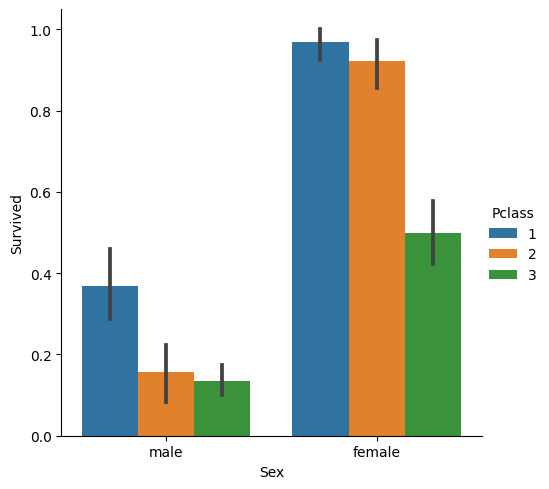

In [10]:
titanic_df = pd.read_csv("./data/Titanic_data.csv")

print(titanic_df)

#이원 분산 분석 모델 생성
#문자열 형태로 회귀식을 받아들여서 모델을 생성하는 함수 ols 
model = ols("Survived ~ C(Sex) + C(Pclass) + C(Sex):C(Pclass)", titanic_df).fit()

#분석
anova_results = anova_lm(model, type=2)

#시각화
sns.catplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df, kind="bar")

### *교호작용*

교호작용(interaction effect) 효과란, 두 개 이상의 독립 변수가 종속 변수에 영향을 미칠 때, 이들 독립 변수들 간의 상호작용이 종속 변수에 영향을 미치는 것을 말합니다. 즉, 하나의 변수만 고려하는 것이 아니라 여러 변수 간의 조합이 종속 변수에 영향을 미치는 것입니다.

     survived  pclass     sex   age  sibsp  parch     fare embarked   class   
0           0       3    male  22.0      1      0   7.2500        S   Third  \
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

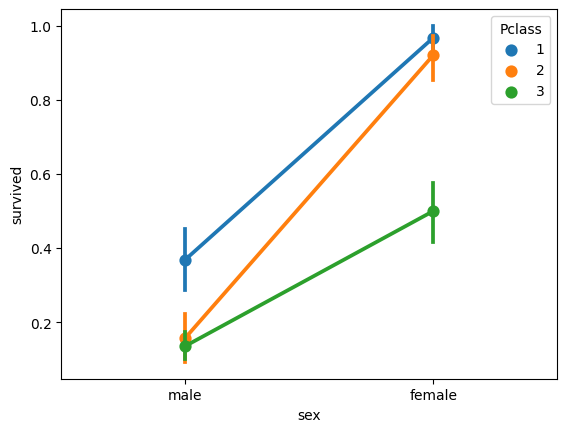

In [11]:
#load data
titanic = sns.load_dataset('titanic')
print(titanic)

sns.pointplot(x="sex", y="survived", hue="pclass", data=titanic)
plt.legend(title="Pclass", loc="best") #loc는 plt.legend의 위치